# Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from mpl_toolkits.mplot3d import Axes3D

## Read csv files containing extracted features from flower images

In [2]:
roses = pd.read_csv('rose_features.csv')
chrysanthemums = pd.read_csv('chrysanthemum_features.csv')
butterfly_pea = pd.read_csv('butterflypea_features.csv')

### Thresholding Function

In [3]:
def step_func(a):
    if a >= 0:
        return 1
    else:
        return -1

## Perceptron Algorithm

In [4]:
def perceptron(weight,learning_rate,d,sample):
    features = np.array([1,sample['r'],sample['b'],sample['eccentricity']])
    
    a = np.sum(features*weight)
    z = step_func(a)
    
    checker = d-z
    delta_w = learning_rate*checker*features
    weight += delta_w
    
    return checker,weight

## Apply Perceptron Algorithm to All Samples

In [5]:
def iterations(class1,class2,learning_rate,error_threshold):
    weights = np.random.random(4)
    d1 = 1 #class 1
    d2 = -1 #class 2

    while True:
        error_sum = 0

        for i in range(len(class1)):
            sample = class1.iloc[i]
            checker,weights = perceptron(weights,learning_rate,d1,sample)
            error_sum += checker**2

        for j in range(len(class2)):
            sample = class2.iloc[j]
            checker,weights = perceptron(weights,learning_rate,d2,sample)
            error_sum += checker**2

        if error_sum < error_threshold:
                break
    
    return weights

## Equation of plane obtained after applying Perceptron Algorithm to features

In [6]:
def line_equation(class1,class2,learning_rate,error_threshold):
    weights = iterations(class1,class2,learning_rate,error_threshold)
    A = weights[1]
    B = weights[2]
    C = weights[3]
    D = weights[0]

    alpha = A/C
    beta = B/C
    gamma = -D/C
    
#     print(A,B,C,D)
    
    return alpha,beta,gamma

## Get equation of plane that separates chrysanthemums from roses

In [7]:
alpha1,beta1,gamma1 = line_equation(roses,chrysanthemums,0.001,0.01)

## Get equation of plane that separates chrysanthemums from butterfly peas

In [8]:
alpha2,beta2,gamma2 = line_equation(chrysanthemums,butterfly_pea,0.001,0.01)

## Get equation of plane that separates roses from butterfly peas

In [9]:
alpha3,beta3,gamma3 = line_equation(butterfly_pea,roses,0.001,0.01)

## Plot r vs b vs eccentricity

In [10]:
xx, yy = np.meshgrid(np.linspace(0,1), np.linspace(0,1))
zz1 = gamma1-(beta1*yy)-(alpha1*xx)
zz2 = gamma2-(beta2*yy)-(alpha2*xx)
zz3 = gamma3-(beta3*yy)-(alpha3*xx)

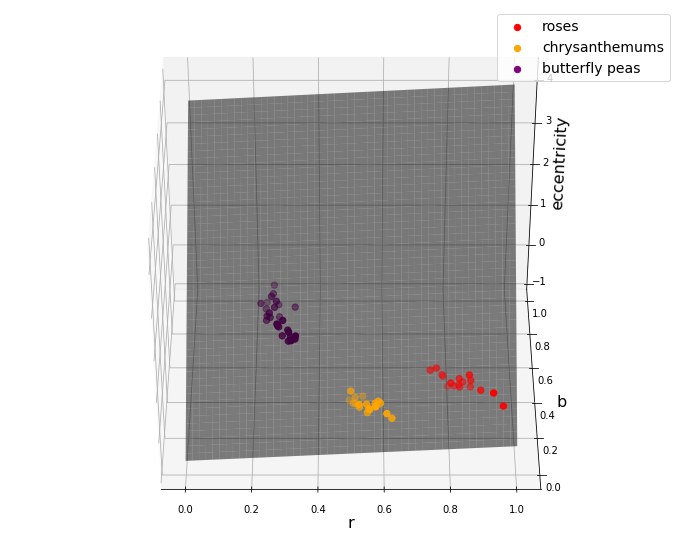

In [11]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

# ax.plot_surface(xx, yy, zz1,color='black',alpha=0.5)
# ax.plot_surface(xx, yy, zz2,color='black',alpha=0.5)
ax.plot_surface(xx, yy, zz3,color='black',alpha=0.5)
ax.scatter(roses['r'], roses['b'], roses['eccentricity'], c='red', marker='o',label='roses',s=40)
ax.scatter(chrysanthemums['r'], chrysanthemums['b'], chrysanthemums['eccentricity'], c='orange', marker='o',label='chrysanthemums',s=40)
ax.scatter(butterfly_pea['r'], butterfly_pea['b'], butterfly_pea['eccentricity'], c='purple', marker='o',label='butterfly peas',s=40)
ax.view_init(elev=40,azim=270)
ax.set_xlabel('r',fontsize=16)
ax.set_ylabel('b',fontsize=16)
ax.set_zlabel('eccentricity',fontsize=16)

plt.legend(fontsize=14)
# plt.savefig('rbe_plane3.png',dpi=300,bbox_inches='tight')
plt.show()